# My First Notebook

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [42]:
klima_gj = pd.read_csv("klima_gj_time.csv", sep=";", decimal = ",", parse_dates=['timeStamp'], index_col="timeStamp")

In [43]:
klima_gj.head(5)

,air_temp_avg,nedbor_mm,precipitation_total_bucket,diff_bucket_last_hour
timeStamp,,,,
2019-10-22 10:00:00,-7.5,1.5,541.2,0.8
2019-10-22 09:00:00,-6.6,1.3,540.4,0.0
2019-10-22 08:00:00,-5.5,2.1,540.4,0.3
2019-10-22 07:00:00,-5.9,0.6,540.1,-0.1
2019-10-22 06:00:00,-5.3,0.5,540.2,0.1


## Resampling data to experiment faster

I used [this](https://towardsdatascience.com/10-python-pandas-tricks-to-make-data-analysis-more-enjoyable-cb8f55af8c30) article to do my approach.

In [45]:
temp_air = klima_gj["air_temp_avg"]
temp_air_W = temp_air.resample("W").mean().dropna() # Weekly
print(temp_air_W.head(5))
temp_air_W.shape

timeStamp
2017-10-15   -3.173377
2017-10-22   -4.142262
2017-10-29   -3.728571
2017-11-05   -5.916667
2017-11-12   -4.513690
Freq: W-SUN, Name: air_temp_avg, dtype: float64


(107,)

In [48]:
Gamanjunni_GPS3 = pd.read_csv("Gamanjunni_GPS3.csv", sep=";", decimal = ",", parse_dates=['EventTime'], index_col="EventTime")
Gamanjunni_GPS3.sort_values(by=['EventTime'], inplace=True, ascending=True)
Gamanjunni_GPS3_w = Gamanjunni_GPS3.resample("W").mean().dropna() # Resampled to daily 
Gamanjunni_GPS3.head()

DataError: No numeric types to aggregate

In [38]:
Gamanjunni_GPS3.index[1]

Timestamp('2015-01-10 12:00:00')

In [109]:
Gamanjunni_GPS6 = pd.read_csv("Gamanjunni_GPS6.csv", sep=";", decimal = ",", parse_dates=['EventTime'], index_col="EventTime")
Gamanjunni_GPS6_w = Gamanjunni_GPS6.resample("W").mean().dropna() # Resampled to daily 
Gamanjunni_GPS6_w.head()

(107, 4)

In [ ]:
Gamanjunni_GPS9 = pd.read_csv("Gamanjunni_GPS6.csv", sep=";", decimal = ",", parse_dates=['EventTime'], index_col="EventTime")
Gamanjunni_GPS9_w = Gamanjunni_GPS9.resample("W").mean().dropna() # Resampled to daily 
Gamanjunni_GPS9_w.head()

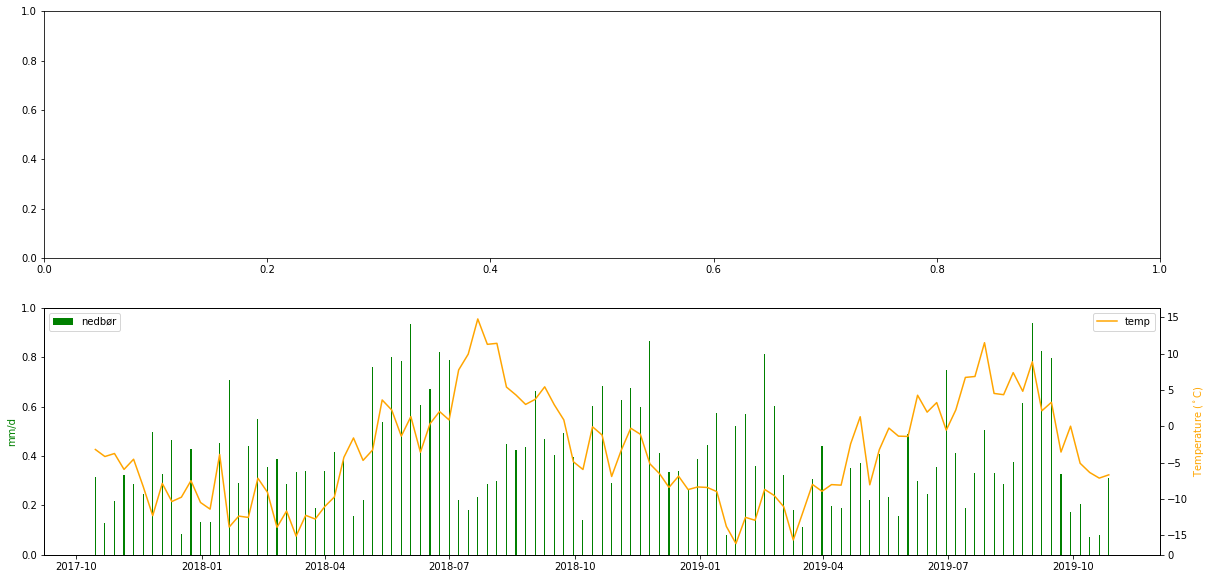

In [150]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(211)

ax1.plot(Mannen_GPS3_w['dE'].index, Mannen_GPS3_w['dE'].values, label="GPS3", color="blue")
ax1.plot(Mannen_GPS6_w['dE'].index, Mannen_GPS6_w['dE'].values, label="GPS6", color='green')
ax1.plot(Mannen_GPS9_w['dE'].index, Mannen_GPS9_w['dE'].values, label="GPS9", color='red')
ax1.set_ylabel("Movement (mm)", color='black')
ax1.set_xlabel('Time (years)')
ax1.legend(loc='upper left')

ax2 = fig.add_subplot(212)

lg_ins1 = ax2.bar(Mannen_precip_w['rain'].index, Mannen_precip_w['rain'].values, label="Precip", color="green")
ax2a = ax2.twinx()
lg_ins2 = ax2a.plot(Mannen_temp0_w['temperature'].index, Mannen_temp0_w['temperature'].values, label="Temp", color='orange')

# Making legend for both y-axis
# lines, labels = ax2.get_legend_handles_labels()
# lines2, labels2 = ax2a.get_legend_handles_labels()
# ax2.legend(lines + labels, lines2 + labels2, loc='upper left')

ax2.set_ylabel("Precipitation (mm)", color='green')
ax2a.set_ylabel("Temperature ($^\circ$C)", color='orange')
ax2.set_xlabel('Time (years)')

# ax2a.set_yticks(np.arange(0, 0.2, 20))
# ax2.set_ylim(0,10)

# fig.set_size_inches(6, 4) 
fig.savefig('Gamanjunni_test.png', dpi=300)

plt.show()

# Get total displacement on y instead of movement per day.
# Plot total movement vector, or both north and east? 

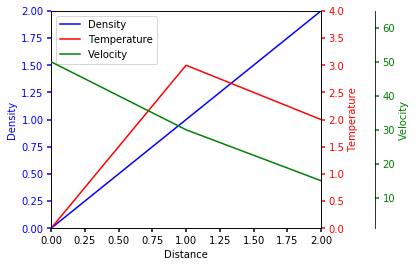

In [144]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

host.set_xlim(0, 2)
host.set_ylim(0, 2)
par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

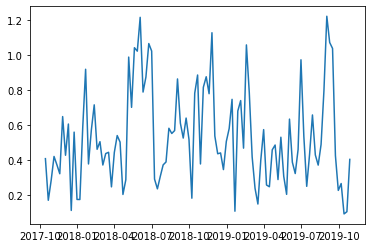

In [112]:
plt.plot(gamanjunni_data['nedbor_mm'])

(array([219., 188., 133.,  75.,  57.,  36.,  20.,   8.,   2.,   1.]),
 array([0.     , 0.23875, 0.4775 , 0.71625, 0.955  , 1.19375, 1.4325 ,
        1.67125, 1.91   , 2.14875, 2.3875 ]),
 <a list of 10 Patch objects>)

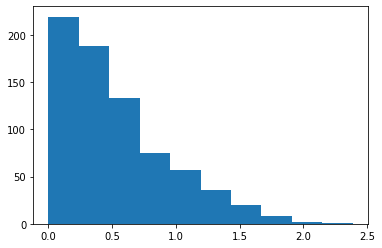

In [98]:
counts, bins = np.histogram(gamanjunni_data['nedbor_mm'].dropna())
plt.hist(bins[:-1], bins, weights=counts)

In [95]:
gamanjunni_data['nedbor_mm'].isna().sum()

5

In [97]:
gamanjunni_data['air_temp_avg'].isna().sum()

5

<BarContainer object of 744 artists>

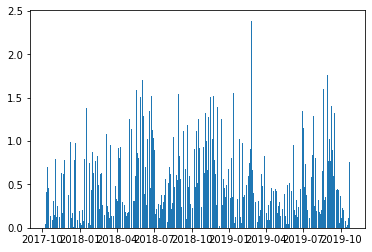

In [100]:
plt.bar(gamanjunni_data['nedbor_mm'].index, gamanjunni_data['nedbor_mm'].values)